# **Problem Statement:** Build an Intrusion Detection System using the KDD Cup 99 dataset to differentiate between intrusive connections and normal connections.

Project by: Rodney Frazier

I decided to do this project in two different ways. The very first apporach will be done with very mininal feature engineering (ie one hot encoding for categorial data) done and no data processing. This will serve as a baseline performance to compare the models that had preprocessing done to them against. This will also help me make informed decisions about which features contribute the most to models performance.

The second approach will have data preprocessing and feature engineering done to the dataset.
Through this approach I will be able to analyze the results to understand the impact of feature engineering on model performance.As well as looking for improvements or any unexpected changes. What I hope to accomplish by this is to make informed decisions about which features contribute most to the model's performance.And to consider any trade-offs, as more complex features may improve training performance but could potentially overfit to the training data.
#Approach one


In [ ]:
#Start by importing the Dataset as well as the required modules/Libraries needed for the project

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

# Fetch the KDD Cup 1999 dataset from OpenML
kddcup99 = fetch_openml(name='KDDCup99', version=1,parser='auto')

# Specify the features (X) and labels (y)
X = kddcup99.data
y = kddcup99.target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Now that the data has been split in an 80/20 fashion. I will be performing data visualizations on the data before preprocessing. This will help me get a better understanding of the training dataset as well as gaining insights about its
characteristics such as data distribution, missing values, and analyzing feature
correlations.

<Figure size 640x480 with 0 Axes>

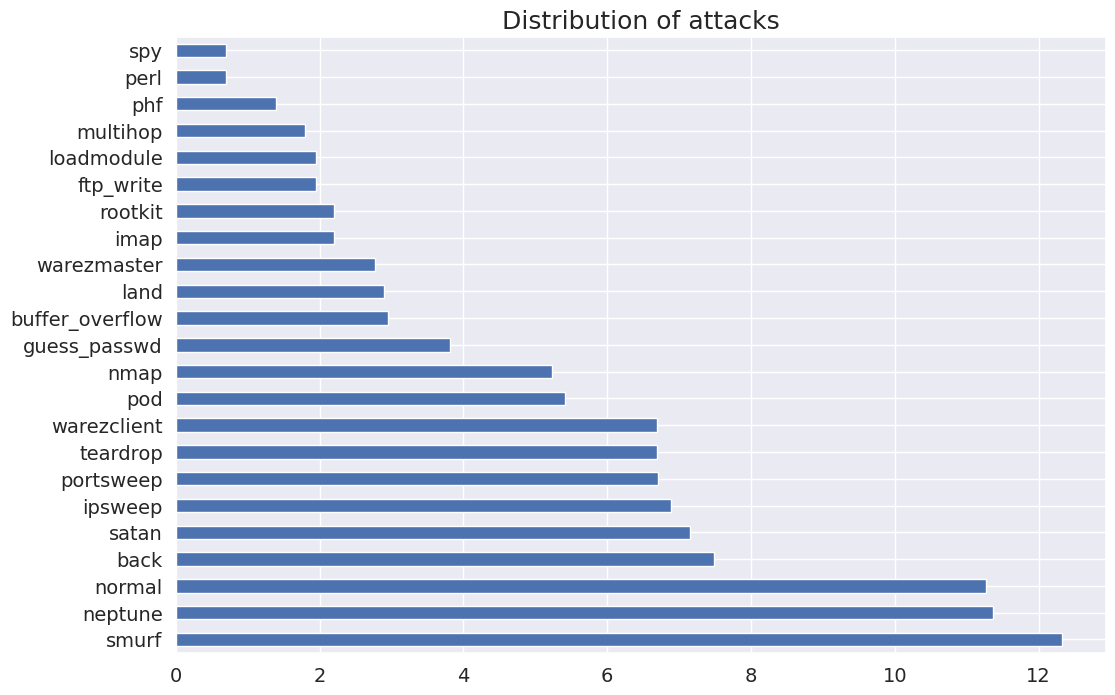

In [ ]:
# Distribution of attacks on the training data
plt.clf()
plt.figure(figsize=(12, 8))
params = {'axes.titlesize': '18',
          'xtick.labelsize': '14',
          'ytick.labelsize': '14'}
matplotlib.rcParams.update(params)
plt.title('Distribution of attacks')

y_train.value_counts().apply(np.log).plot(kind='barh')

plt.show()

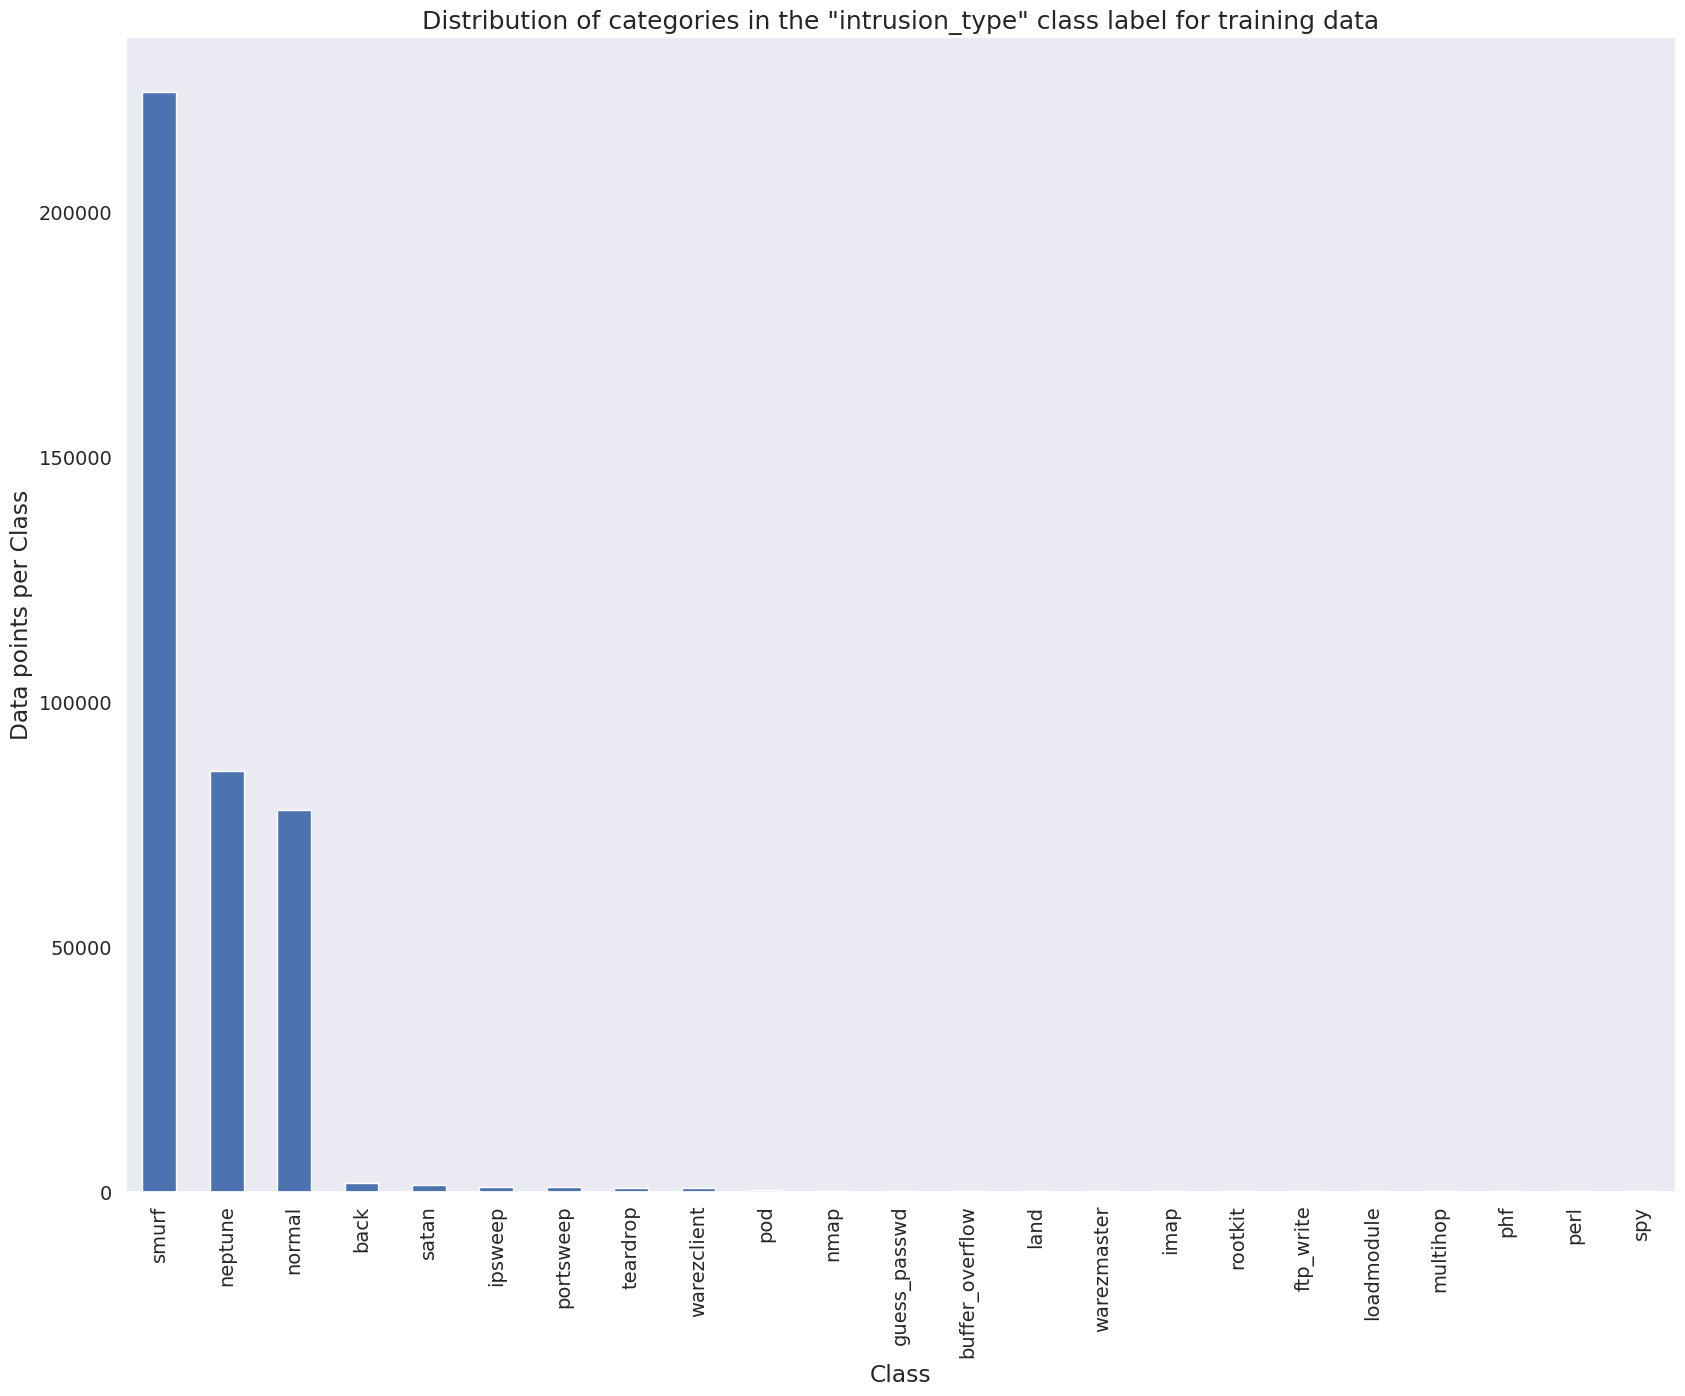

In [ ]:
# Distribution of categories in class label for training data
plt.figure(figsize=(20, 15))

# Distribution of categories in the 'intrusion_type' class label for training data
class_distribution_train = pd.Series(y_train).value_counts()
class_distribution_train.plot(kind='bar')

plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of categories in the "intrusion_type" class label for training data')
plt.grid()
plt.show()

# **Training the First Model: Gaussian Naive Bayes**

In [ ]:
# Create a DataFrame from the dataset
df = pd.DataFrame(data=np.c_[kddcup99.data, kddcup99.target], columns=kddcup99.feature_names + ['target'])

# Extract categorical features (protocol, service, flag)
categorical_features = ['protocol_type', 'service', 'flag']

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Separate features (X) and target variable (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train and X_test containing the one-hot encoded features for training and testing
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Extract precision, recall, and F1-score for each class
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("=" * 50)
print("Accuracy:", accuracy)
print("=" * 50)
print("Precision score is:")
print(precision)
print("=" * 50)
print("Recall score is:")
print(recall)
print("=" * 50)
print("F1-score is:")
print(f1_score)
print("=" * 50)


Accuracy: 0.9467734099834015
Precision score is:
0.9835362273210527
Recall score is:
0.9467734099834015
F1-score is:
0.9612930229671744


# **Training the Second Model: Logistic Regression**

In [ ]:
# Create a DataFrame from the dataset
df = pd.DataFrame(data=np.c_[kddcup99.data, kddcup99.target], columns=kddcup99.feature_names + ['target'])

# Extract categorical features (protocol, service, flag)
categorical_features = ['protocol_type', 'service', 'flag']

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Separate features (X) and target variable (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train and X_test containing the one-hot encoded features for training and testing

from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Extract precision, recall, and F1-score for each class
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Display the results
print(f"Accuracy: {accuracy}")
print("=" * 50)
print("Precision score is:")
print(precision)
print("=" * 50)
print("Recall score is:")
print(recall)
print("=" * 50)
print("F1-score is:")
print(f1_score)
print("=" * 50)


Accuracy: 0.9460143314035869
Precision score is:
0.9386070780264777
Recall score is:
0.9460143314035869
F1-score is:
0.9384670332962686


# **Training the Third Model: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Create a DataFrame from the dataset
df = pd.DataFrame(data=np.c_[kddcup99.data, kddcup99.target], columns=kddcup99.feature_names + ['target'])

# Extract categorical features (protocol, service, flag)
categorical_features = ['protocol_type', 'service', 'flag']

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Separate features (X) and target variable (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# DPrinting the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print("=" * 50)
print("Precision score is:")
print(precision)
print("=" * 50)
print("Recall score is:")
print(recall)
print("=" * 50)
print("F1-score is:")
print(f1_score)
print("=" * 50)


Accuracy: 99.96%
Precision score is:
0.99959459867897
Recall score is:
0.9996255212339581
F1-score is:
0.9995954296395474


# **Training the Fourth Model: Decision Trees**

In [ ]:
# Import the necessary modules
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Extract precision, recall, and F1-score for each class
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Printing the evaluation metrics
print("=" * 50)
print("Accuracy: {:.2f}".format(accuracy))
print("=" * 50)
print("Precision score is:")
print(precision)
print("=" * 50)
print("Recall score is:")
print(recall)
print("=" * 50)
print("F1-score is:")
print(f1_score)
print("=" * 50)

Accuracy: 1.00
Precision score is:
0.9995339949748263
Recall score is:
0.9995243107566495
F1-score is:
0.9995108765813304


# **Training the Fifth Model: SVM(Support Vector Machine)**

In [ ]:
from sklearn.svm import SVC

# Create a DataFrame from the dataset
df = pd.DataFrame(data=np.c_[kddcup99.data, kddcup99.target], columns=kddcup99.feature_names + ['target'])

# Extract categorical features (protocol, service, flag)
categorical_features = ['protocol_type', 'service', 'flag']

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Separate features (X) and target variable (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Extract precision, recall, and F1-score for each class
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Printing the evaluation metrics
print("=" * 50)
print("Precision score is:")
print(precision)
print("=" * 50)
print("Recall score is:")
print(recall)
print("=" * 50)
print("F1-score is:")
print(f1_score)
print("=" * 50)

Accuracy: 1.00
Precision score is:
0.9990624400694367
Recall score is:
0.9991093477996842
F1-score is:
0.9990635201052371


# **Training the Sixth Model: Gradient-boosted Decision Trees with XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Create a DataFrame from the dataset
df = pd.DataFrame(data=np.c_[kddcup99.data, kddcup99.target], columns=kddcup99.feature_names + ['target'])

# Extract categorical features (protocol, service, flag)
categorical_features = ['protocol_type', 'service', 'flag']

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Separate features (X) and target variable (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Convert string labels to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert object columns to numeric in X_train
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Drop any rows with missing values that may have resulted from the conversion
X_train = X_train.dropna()

# Convert object columns to numeric in X_test
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Drop any rows with missing values that may have resulted from the conversion
X_test = X_test.dropna()

# Create an instance of XGBClassifier
xgb_model = XGBClassifier()

# Train the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Extract precision, recall, and F1-score for each class
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Printing the evaluation metrics
print("=" * 50)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("=" * 50)
print("Precision score is:")
print(precision)
print("=" * 50)
print("Recall score is:")
print(recall)
print("=" * 50)
print("F1-score is:")
print(f1_score)
print("=" * 50)



Accuracy: 99.98%
Precision score is:
0.9998063606128312
Recall score is:
0.9997975790453828
F1-score is:
0.9997901622664177


# Approach Two



In [4]:
#Start by importing the Dataset as well as the required modules/Libraries needed for the project
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
# Fetch the KDD Cup 1999 dataset from OpenML
kddcup99 = fetch_openml(name='KDDCup99', version=1,parser='auto')



# **Data Preprocessing & Feature Engineering**
In this step I am about to clean and preprocess my data. Unlike approach one that only had onehot encoding done in order to work with ML models like SVM(Support Vector Machine). I made sure to drop duplicates, check for missing values, encode catgorical features, extract continous features which were standarized.

# use PCA with models


In [5]:
# Create a DataFrame from the fetched data
df = pd.DataFrame(data=kddcup99.data, columns=kddcup99.feature_names + ['target'])
df['target'] = kddcup99.target

# Drop rows with missing values
df = df.dropna()

# Drop duplicate rows
df = df.drop_duplicates()

# Extract categorical features
categorical_features = ['protocol_type', 'service', 'flag']

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Extract continuous features
continuous_features = [col for col in df_encoded.columns if col not in ['target']]

# Apply standardization to continuous features
scaler = StandardScaler()

df_encoded[continuous_features] = scaler.fit_transform(df_encoded[continuous_features])

# Splitting the data into training and testing sets
X = df_encoded.drop('target', axis=1)

y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Exploratory Data Analysis**

Now I am about to perform Exploratory data analysis (EDA).
This is for for analyzing the dataset to summarize their main characteristics with visual methods. This will also help me visualize the differences between data that has been preprocessed as well as had feature enginerring done to it

<Figure size 640x480 with 0 Axes>

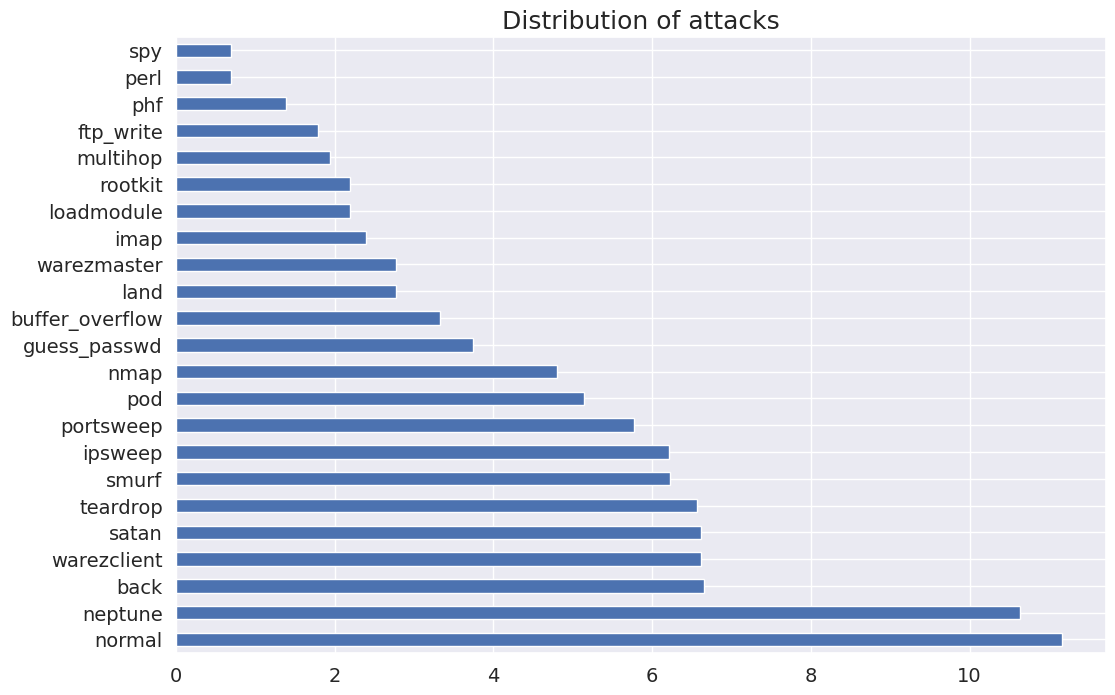

In [ ]:
# Distribution of attacks on the training data
plt.clf()
plt.figure(figsize=(12, 8))
params = {'axes.titlesize': '18',
          'xtick.labelsize': '14',
          'ytick.labelsize': '14'}
matplotlib.rcParams.update(params)
plt.title('Distribution of attacks')

y_train.value_counts().apply(np.log).plot(kind='barh')

plt.show()


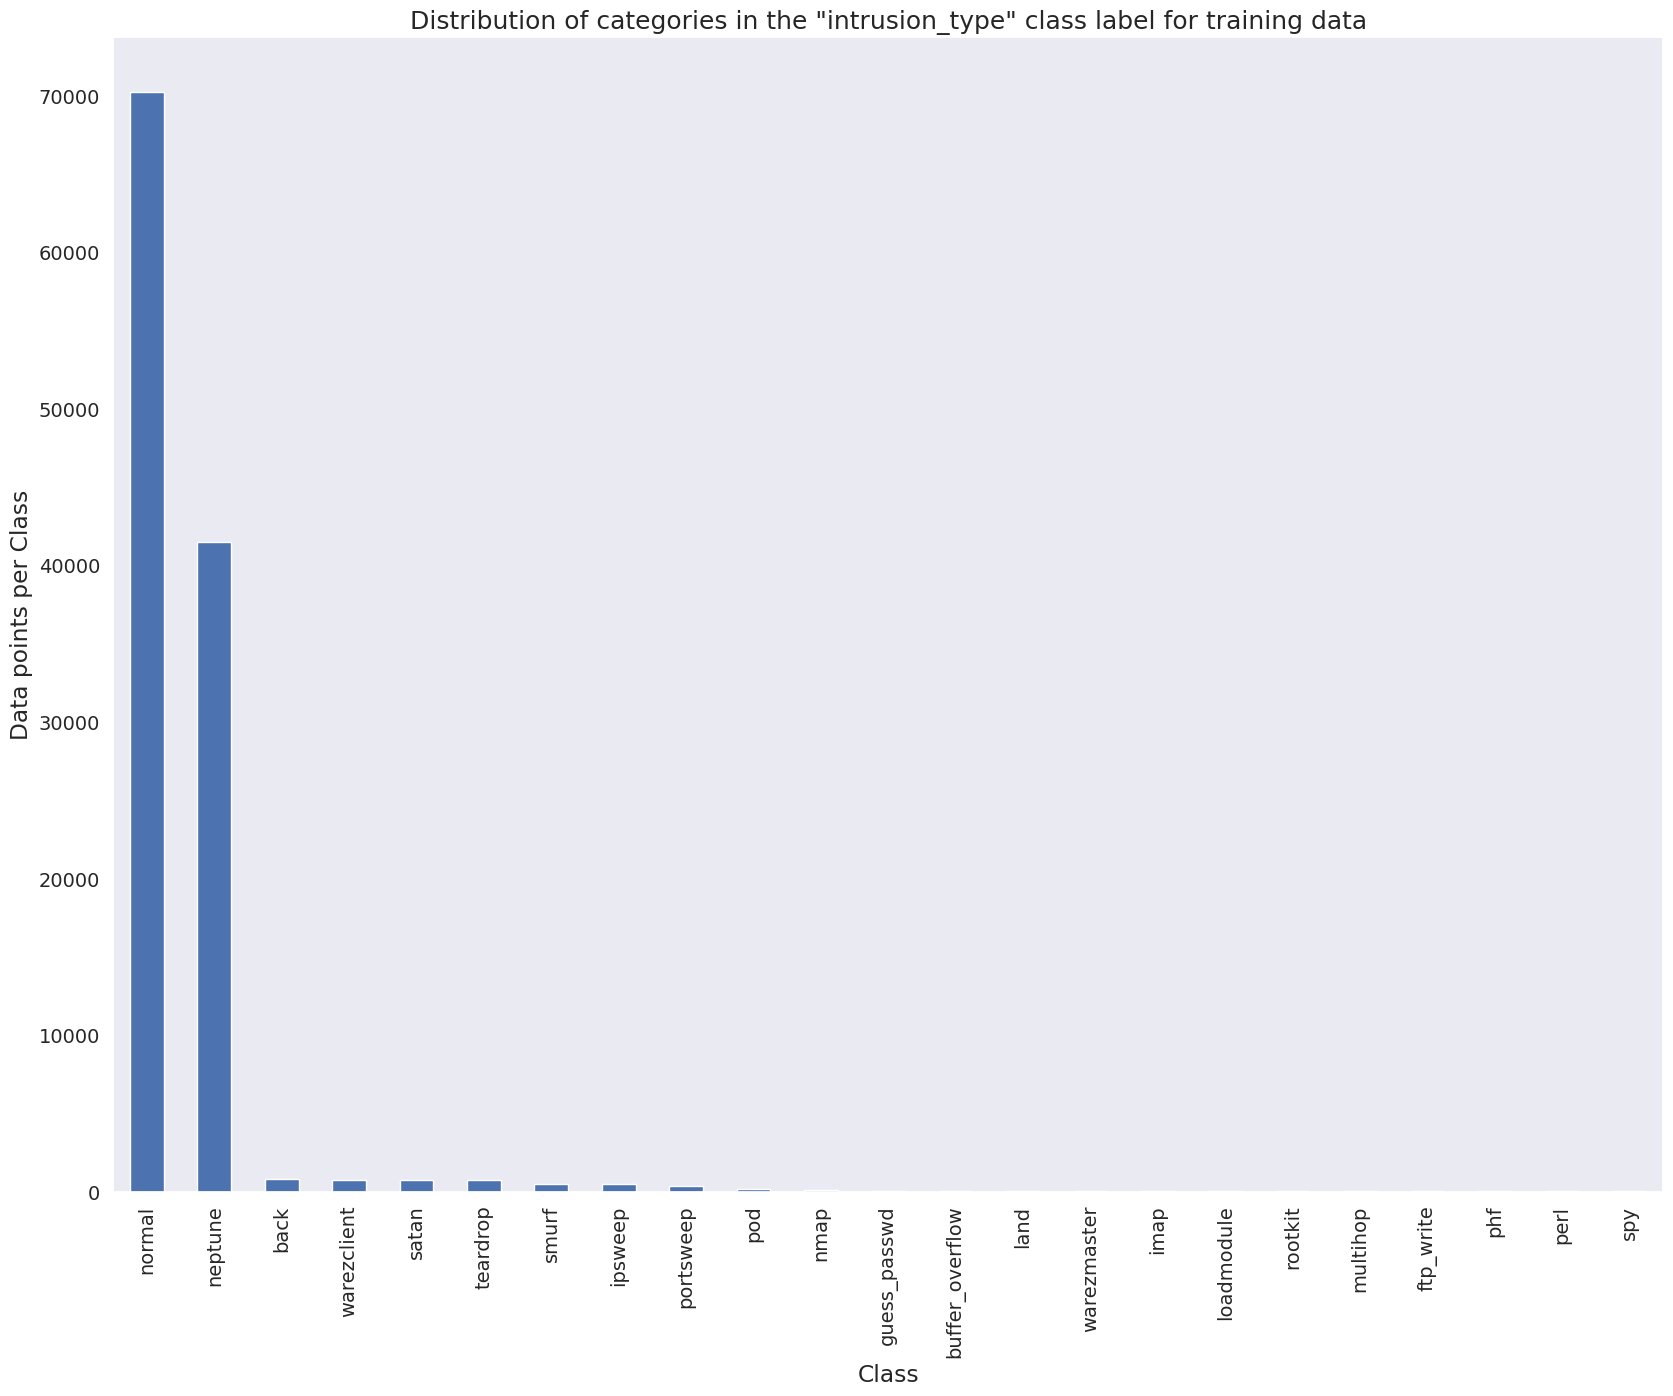

In [ ]:
# Distribution of categories in class label for training data
plt.figure(figsize=(20, 15))

# Distribution of categories in the 'intrusion_type' class label for training data
class_distribution_train = pd.Series(y_train).value_counts()
class_distribution_train.plot(kind='bar')

plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of categories in the "intrusion_type" class label for training data')
plt.grid()
plt.show()

# **Functions for printing the results
ie confusion matrix and performance scores **

In [6]:
def confusion_matrix_func(Y_test, y_test_pred):
    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit',
              'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan',
              'smurf', 'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20, 15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size": 12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

In [7]:
def model_evaluation(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    y_tr_pred = model.predict(X_train)

    results_tr = dict()
    y_tr_pred = model.predict(X_train)
    results_tr['accuracy'] = accuracy_score(Y_train, y_tr_pred)
    results_tr['precision'] = precision_score(Y_train, y_tr_pred, average='weighted')
    results_tr['recall'] = recall_score(Y_train, y_tr_pred, average='weighted')
    results_tr['f1_score'] = f1_score(Y_train, y_tr_pred, average='weighted')

    results_test = dict()
    y_test_pred = model.predict(X_test)


    print('Performance metrics:')
    print('=' * 50)
    results_test['accuracy'] = accuracy_score(Y_test, y_test_pred)
    print('Accuracy is:')
    print(accuracy_score(Y_test, y_test_pred))
    print('=' * 50)
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(precision_score(Y_test, y_test_pred, average='weighted'))
    print('=' * 50)
    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(recall_score(Y_test, y_test_pred, average='weighted'))
    print('=' * 50)
    print('f1 score is:')
    print(f1_score(Y_train, y_tr_pred, average='weighted'))



# **Model Training & Results **


# **Training the First Model: Gaussian Naive Bayes**

Best Hyperparameters: {'var_smoothing': 10}
Performance metrics:
Accuracy is:
0.6492083662465227
Precision score is:
0.7660950458278881
Recall score is:
0.6492083662465227
f1 score is:
0.5427096684500772


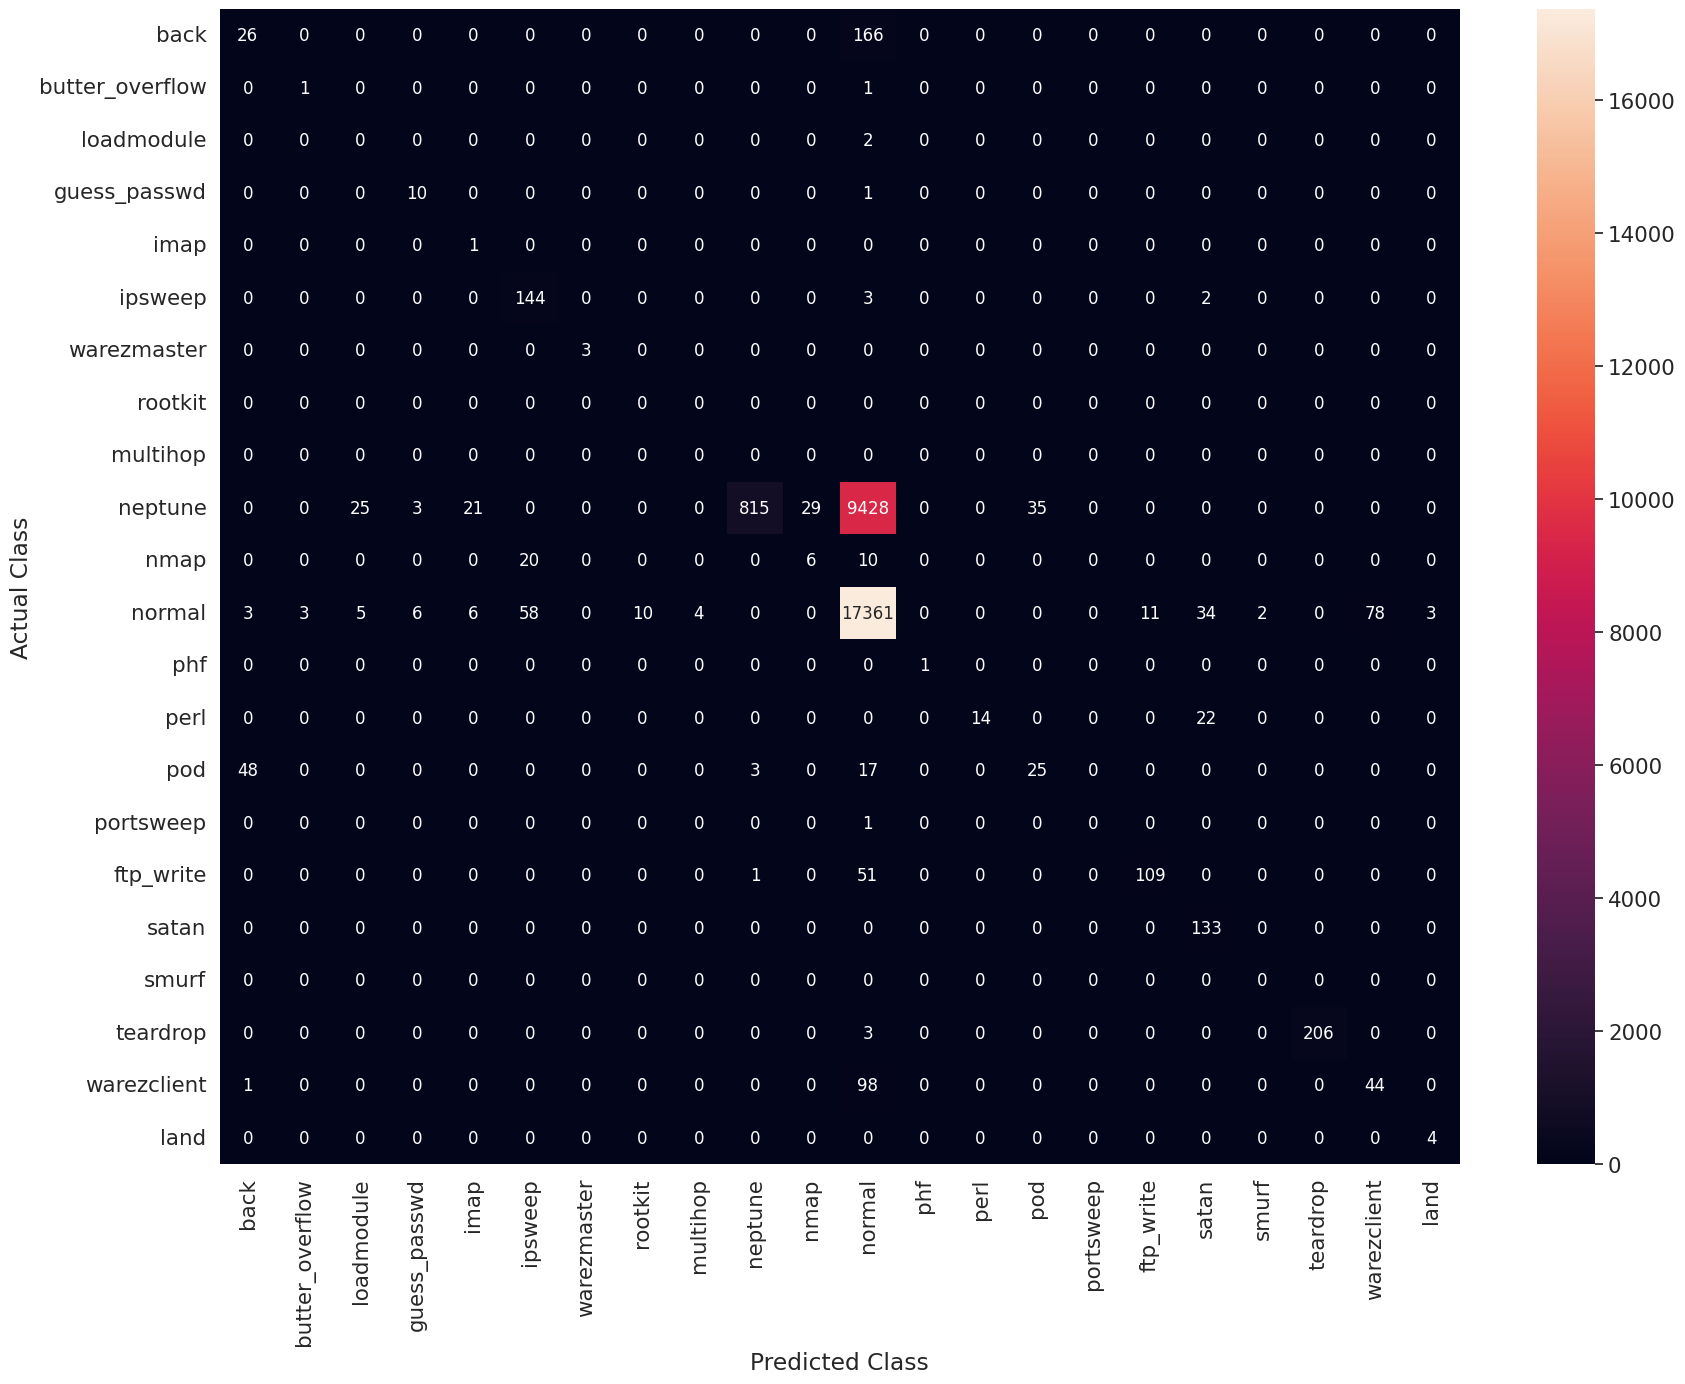

In [8]:
from sklearn.naive_bayes import GaussianNB

# Create Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Define hyperparameters for tuning
hyperparameters = {'var_smoothing': [10**x for x in range(-9, 3)]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(gnb_model, hyperparameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_gnb_model = grid_search.best_estimator_

# Evaluating the model using the function above
model_evaluation(best_gnb_model, X_train, y_train, X_test, y_test)

# visualizing the confusion matrix
y_test_pred = best_gnb_model.predict(X_test)
confusion_matrix_func(y_test, y_test_pred)


# **Training the Second Model: Logistic Regression**

Best Hyperparameters: {'C': 100.0, 'penalty': 'l2'}
Performance metrics:
Accuracy is:
0.9982141017275131
Precision score is:
0.9982190817295177
Recall score is:
0.9982141017275131
f1 score is:
0.9981829103471527


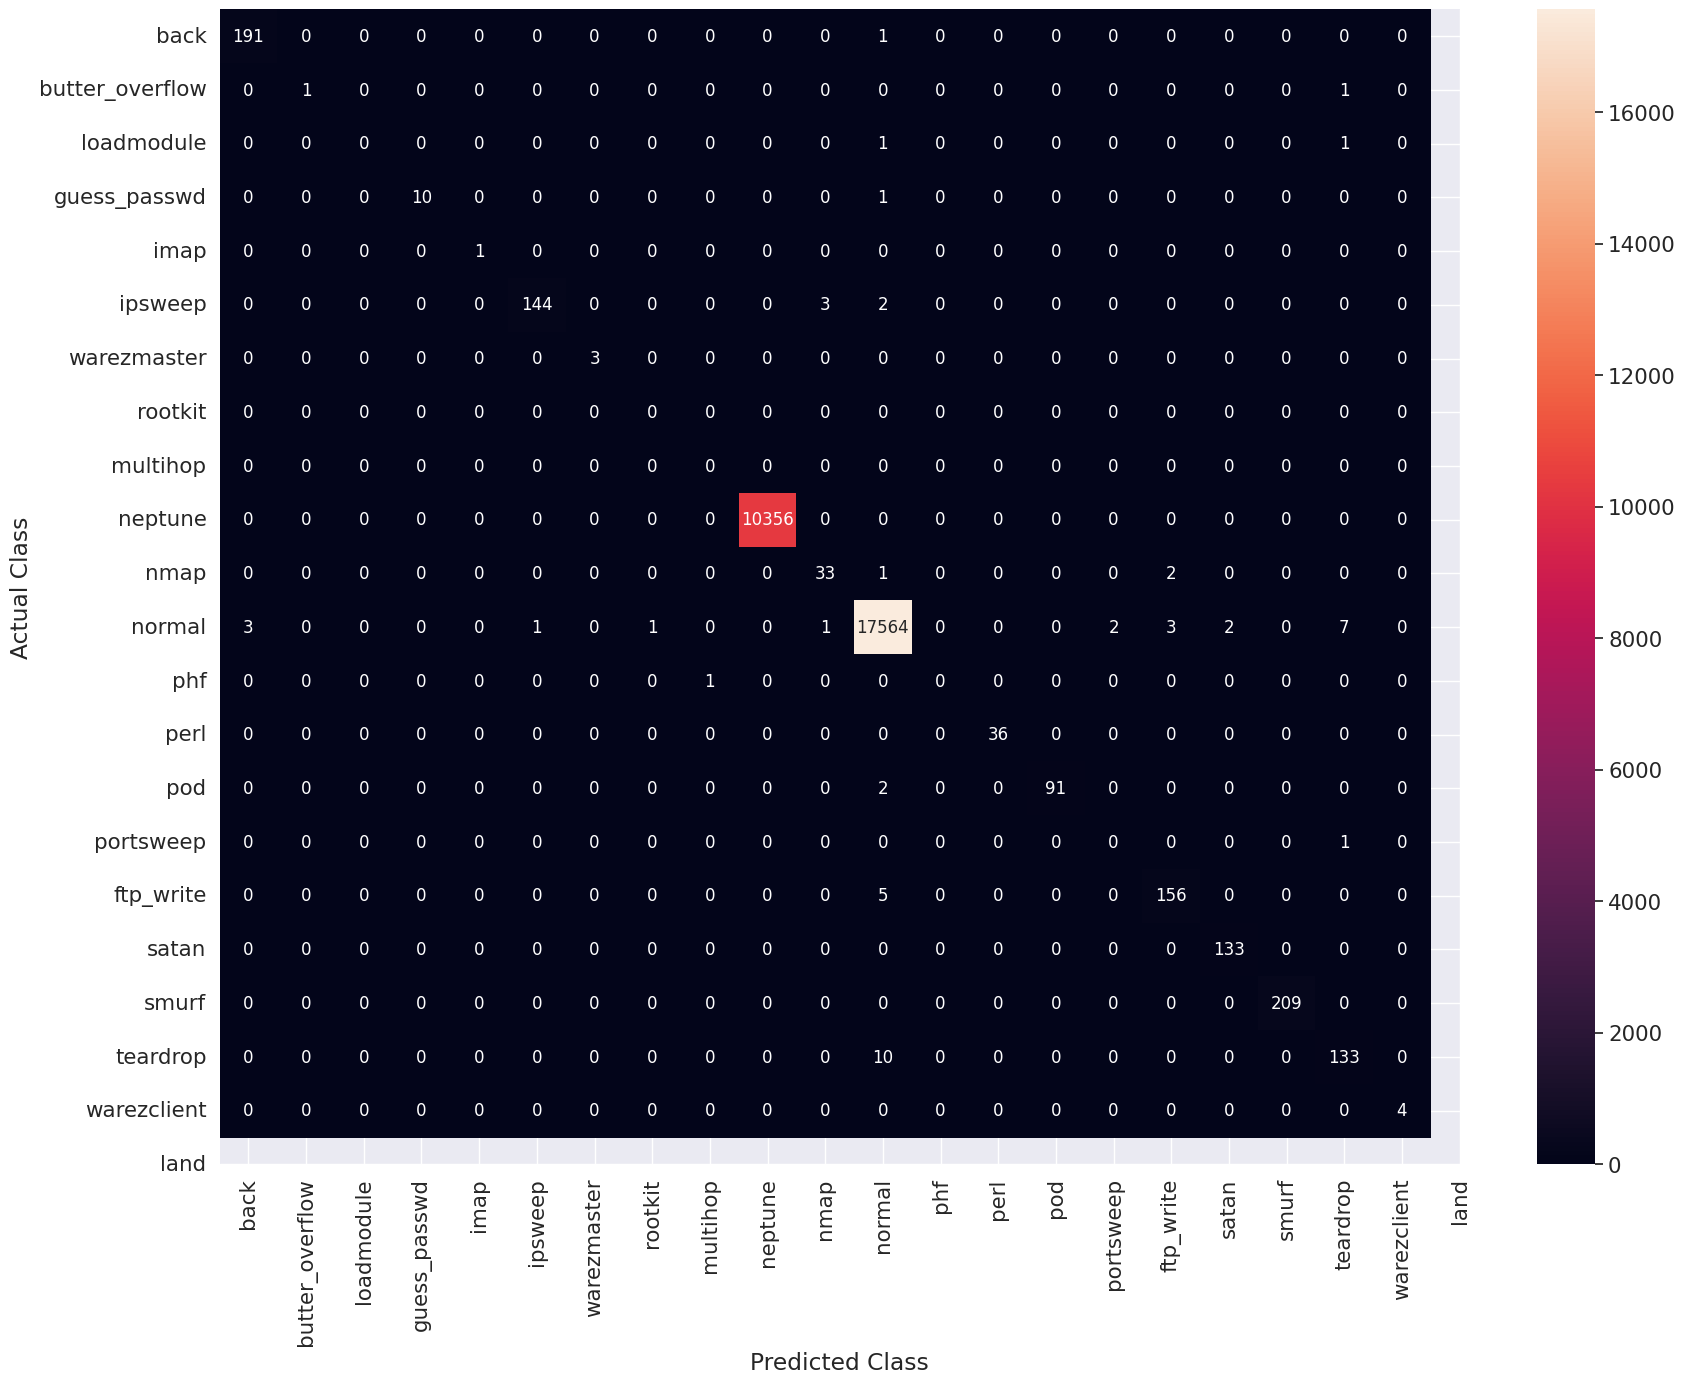

In [9]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Define hyperparameters for tuning
hyperparameters = {
    'C': [1/x for x in [0.001, 0.01, 0.1, 1, 10, 20, 30]],
    'penalty': ['l1', 'l2']
}

# Use GridSearchCV to find the best hyperparameters
grid_search_logreg = GridSearchCV(logreg_model, hyperparameters, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)

# Get the best hyperparameters
best_params_logreg = grid_search_logreg.best_params_
print("Best Hyperparameters:", best_params_logreg)

# Use the best model for prediction
best_logreg_model = grid_search_logreg.best_estimator_

# Evaluating the model using the function above
model_evaluation(best_logreg_model, X_train, y_train, X_test, y_test)

# visualizing the confusion matrix
y_test_pred_logreg = best_logreg_model.predict(X_test)
confusion_matrix_func(y_test, y_test_pred_logreg)




## Training the Third Model: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest model
rf_model = RandomForestClassifier(criterion='gini', class_weight='balanced', random_state=42)

# Define hyperparameters for tuning
hyperparameters = {
    'max_depth': [5, 10, 100, 500, 1000],
    'n_estimators': [5, 10, 50, 100, 500],
    'min_samples_split': [5, 10, 100, 500]
}

# Use GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(rf_model, hyperparameters, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)

# Use the best model for prediction
best_rf_model = grid_search_rf.best_estimator_

# Evaluating the model using the functions above
model_evaluation(best_rf_model, X_train, y_train, X_test, y_test)

# visualizing the confusion matrix
y_test_pred_rf = best_rf_model.predict(X_test)
confusion_matrix_func(y_test, y_test_pred_rf)

# **Training the Fourth Model: Decision Trees**

Best Hyperparameters: {'max_depth': 50, 'min_samples_split': 5}
Performance metrics:
Accuracy is:
0.9987292646907305
Precision score is:
0.9988445832986061
Recall score is:
0.9987292646907305


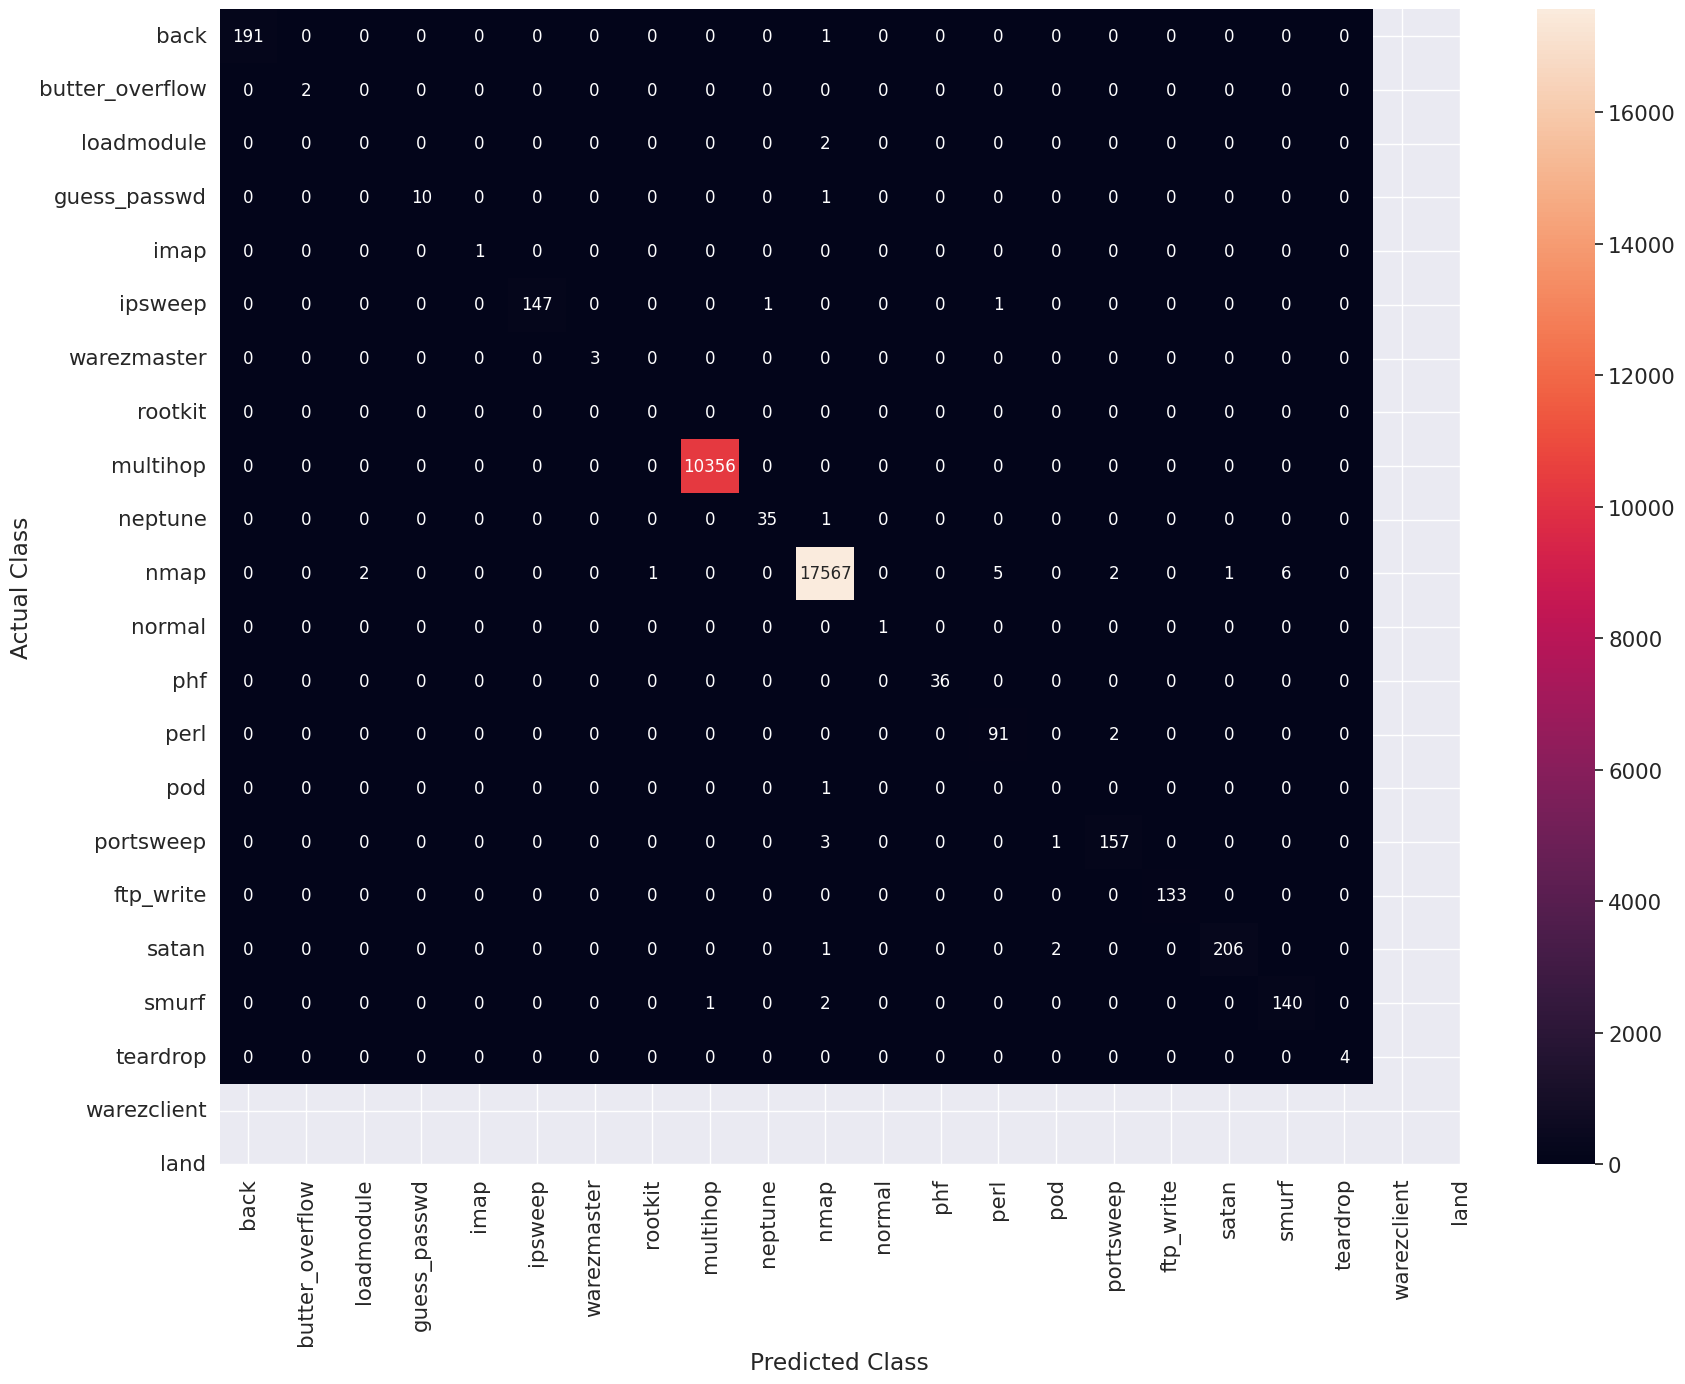

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree model
decision_tree_model = DecisionTreeClassifier(criterion='gini', splitter='best', class_weight='balanced', random_state=42)

# Define hyperparameters for tuning
hyperparameters = {
    'max_depth': [5, 10, 20, 50, 100, 500],
    'min_samples_split': [5, 10, 100, 500]
}

# Use GridSearchCV to find the best hyperparameters
grid_search_decision_tree = GridSearchCV(decision_tree_model, hyperparameters, cv=5, scoring='accuracy')
grid_search_decision_tree.fit(X_train, y_train)

# Get the best hyperparameters
best_params_decision_tree = grid_search_decision_tree.best_params_
print("Best Hyperparameters:", best_params_decision_tree)

# Use the best model for prediction
best_decision_tree_model = grid_search_decision_tree.best_estimator_

# Evaluating the model using the functions above
model_evaluation(best_decision_tree_model, X_train, y_train, X_test, y_test)

# visualizing the confusion matrix
y_test_pred_decision_tree = best_decision_tree_model.predict(X_test)
confusion_matrix_func(y_test, y_test_pred_decision_tree)

# **Training the Fifth Model: SVM(Support Vector Machine)**

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
Performance metrics:
Accuracy is:
0.9984201669128001
Precision score is:
0.9984698385600574
Recall score is:
0.9984201669128001


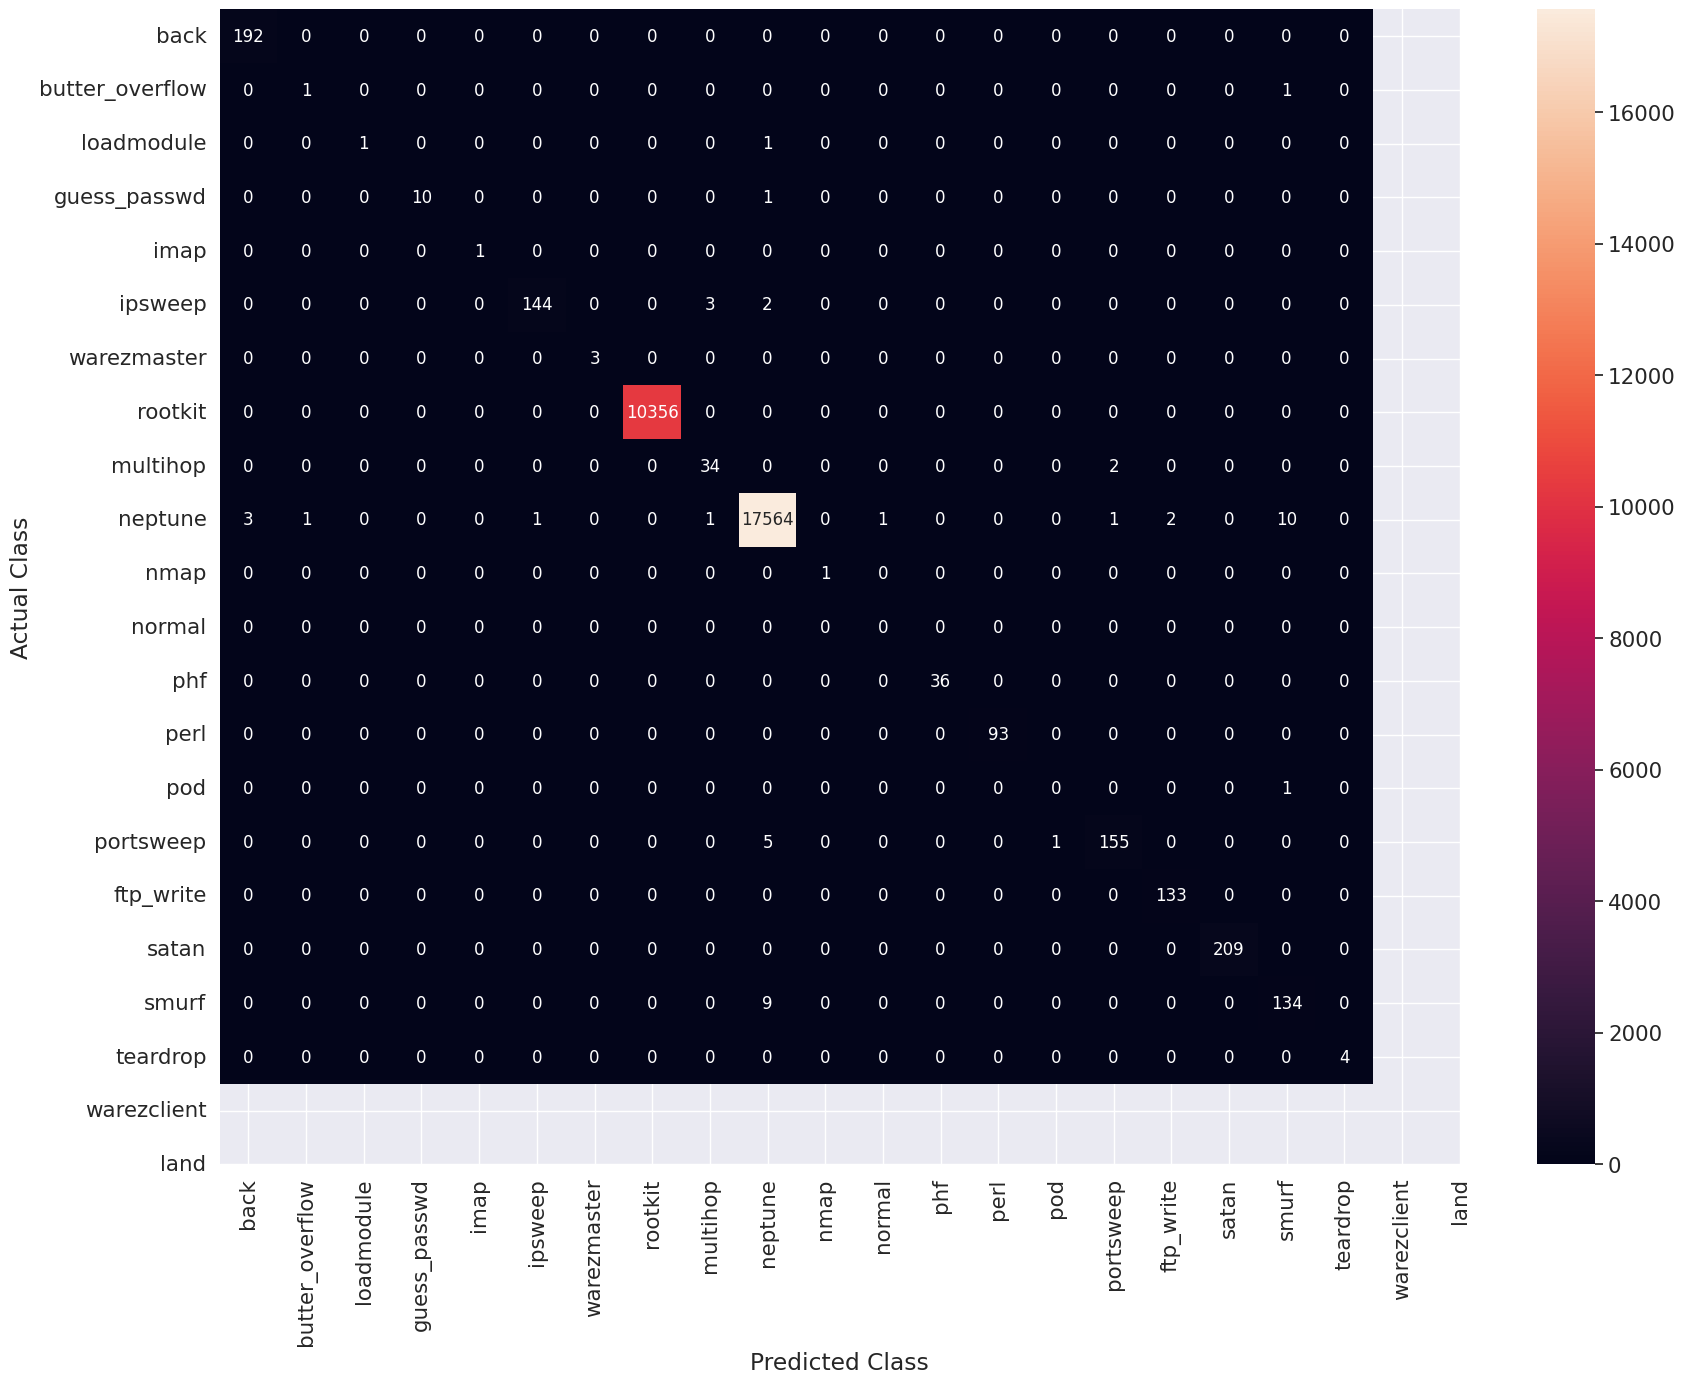

In [ ]:
from sklearn.svm import SVC


# Create SVM model
svm_model = SVC()

# Define hyperparameters for tuning
hyperparameters = {
    'C': [0.1, 1],  # Further reduced C values
    'kernel': ['linear'],  # Only linear kernel for simplicity
}

# Use GridSearchCV to find the best hyperparameters
svm_grid_search = GridSearchCV(svm_model, param_grid=hyperparameters, cv=5, verbose=1, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_svm = svm_grid_search.best_params_
print("Best Hyperparameters:", best_params_svm)

# Use the best model for prediction
best_svm_model = svm_grid_search.best_estimator_

# Evaluating the model using the functions above
model_evaluation(best_svm_model, X_train, y_train, X_test, y_test)

# visualizing the confusion matrix
y_test_pred_svm = best_svm_model.predict(X_test)
confusion_matrix_func(y_test, y_test_pred_svm)


# **Training the Sixth Model: Gradient-boosted Decision Trees with XGBoost**

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Accuracy: 99.99%
Precision score is:
0.9992778508528385
Recall score is:
0.999416148641687
F1-score is:
0.9993460804617935


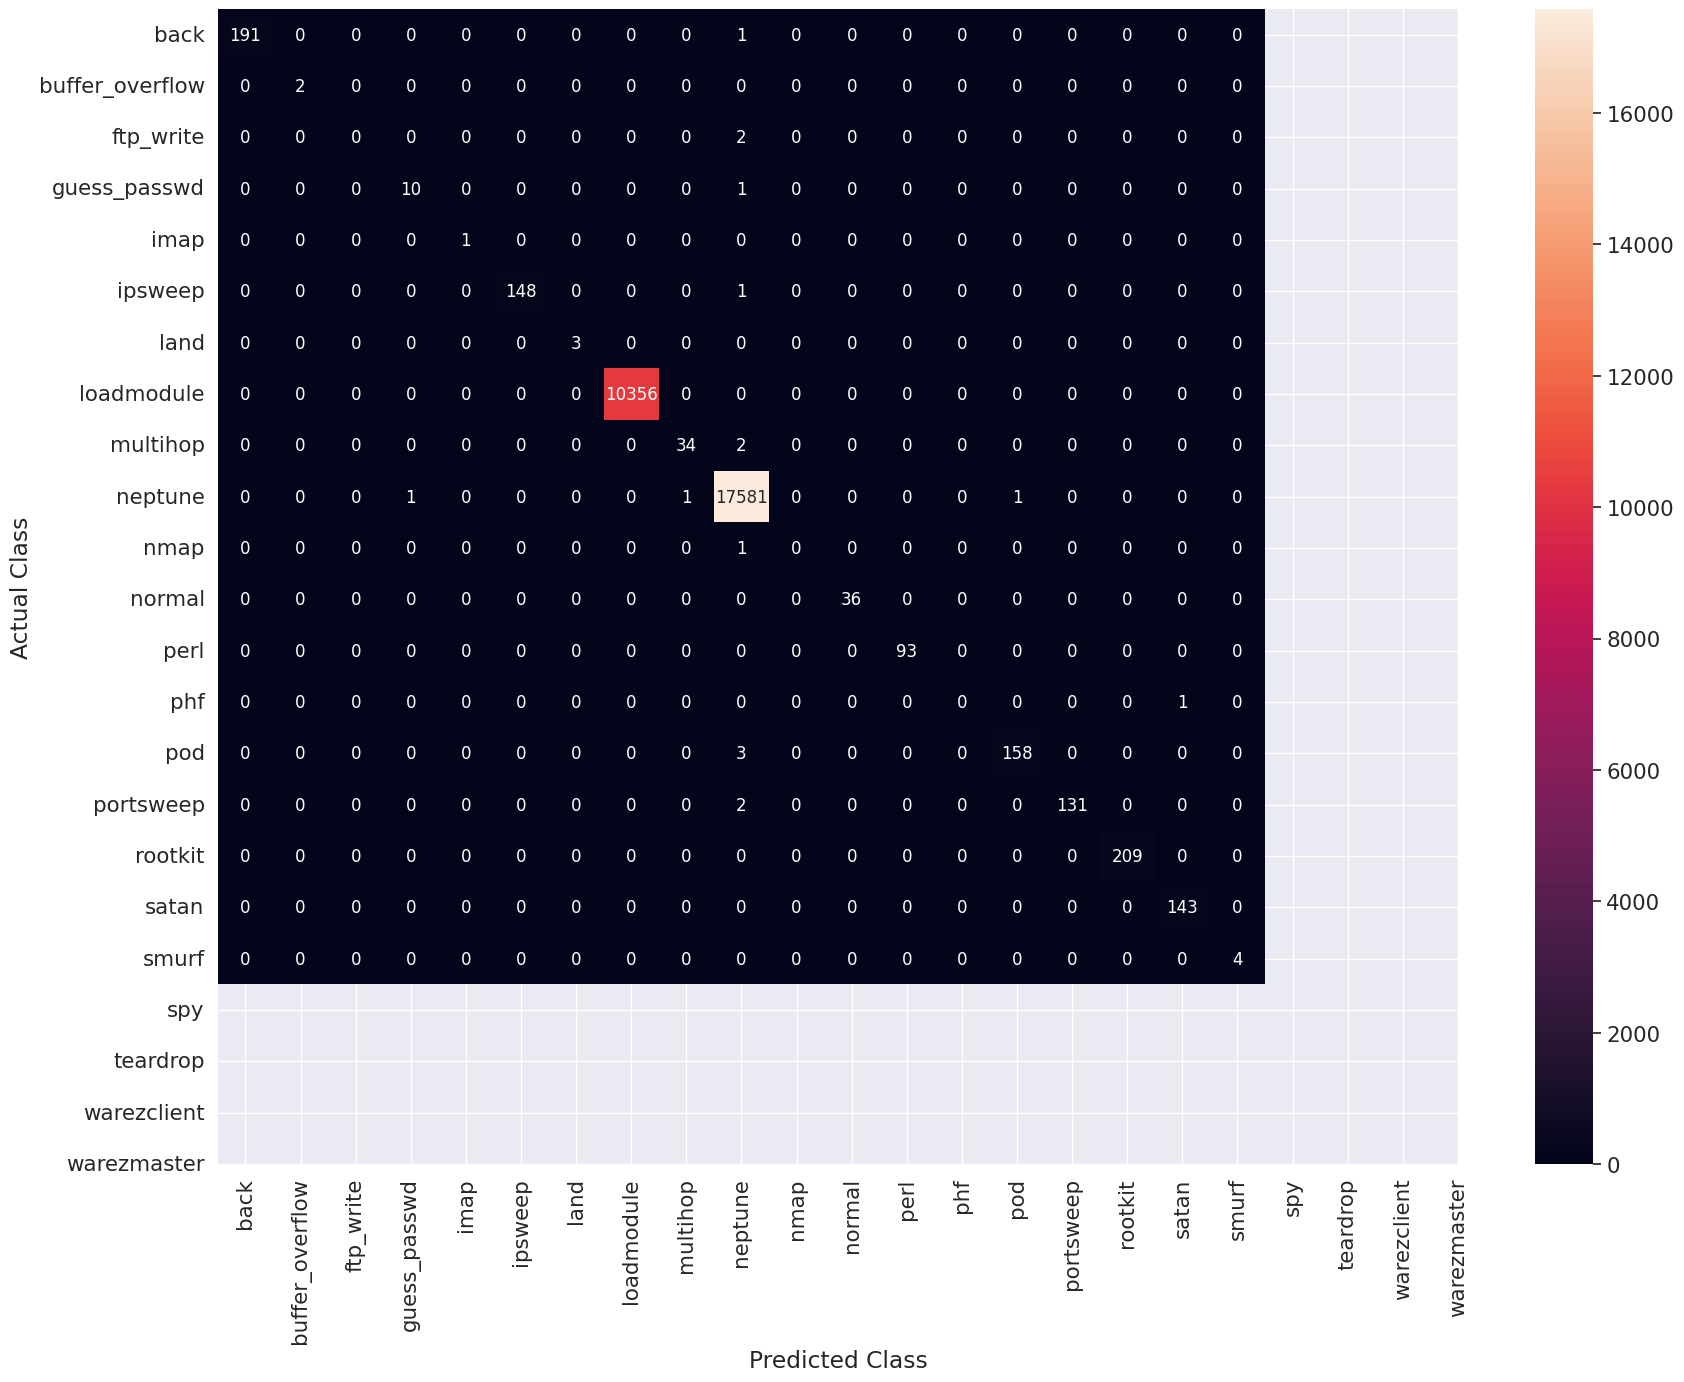

In [ ]:
"I had to rewrite the code for this model from scratch since I ran into a lot of issues thats why the functions have been intergrated into the model"

import xgboost as xgb

# Fetch the KDD Cup 1999 dataset from OpenML
kddcup99 = fetch_openml(name='KDDCup99', version=1, parser='auto')
# Create a DataFrame from the fetched data
df = pd.DataFrame(data=kddcup99.data, columns=kddcup99.feature_names + ['target'])
df['target'] = kddcup99.target

# Drop rows with missing values
df = df.dropna()

# Drop duplicate rows
df = df.drop_duplicates()

# Extract categorical features
categorical_features = ['protocol_type', 'service', 'flag']

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Extract continuous features
continuous_features = [col for col in df_encoded.columns if col not in ['target']]

# Apply standardization to continuous features
scaler = StandardScaler()
df_encoded[continuous_features] = scaler.fit_transform(df_encoded[continuous_features])

# Splitting the data into training and testing sets
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

def confusion_matrix_func(Y_test, y_test_pred):
    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = list(label_encoder.classes_)
    plt.figure(figsize=(20, 15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size": 12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

def model_evaluation(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)

    # Train set results
    y_tr_pred = model.predict(X_train)
    results_tr = dict()
    results_tr['accuracy'] = accuracy_score(Y_train, y_tr_pred)
    results_tr['precision'] = precision_score(Y_train, y_tr_pred, average='weighted')
    results_tr['recall'] = recall_score(Y_train, y_tr_pred, average='weighted')
    results_tr['f1_score_weighted'] = f1_score(Y_train, y_tr_pred, average='weighted')

    # Test set results
    y_test_pred = model.predict(X_test)

    # Extract precision, recall, and F1-score for the weighted average
    precision, recall, f1, _ = precision_recall_fscore_support(Y_test, y_test_pred, average='weighted')

    # Print the results
    print("=" * 50)
    print(f"Accuracy: {results_tr['accuracy'] * 100:.2f}%")
    print("=" * 50)
    print("Precision score is:")
    print(precision)
    print("=" * 50)
    print("Recall score is:")
    print(recall)
    print("=" * 50)
    print("F1-score is:")
    print(f1)
    print("=" * 50)

    # Plotting the confusion matrix
    confusion_matrix_func(y_test_encoded, y_test_pred)


# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Specify the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
}


# Perform a GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(X_train, y_train_encoded)

# Evaluating the model
model_evaluation(best_xgb_model, X_train, y_train_encoded, X_test, y_test_encoded)





# **Data Exploration**

I decided to add my data exploariton here since It caused errors being at the top of the collab notebook.

In [2]:
# Importing the required Python Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Fetch the KDD Cup 1999 dataset from OpenML
kddcup99 = fetch_openml(name='KDDCup99', version=1,parser='auto')

# Extract features and target variable
features = kddcup99.feature_names + ['intrusion_type']
data = pd.DataFrame(np.c_[kddcup99.data, kddcup99.target], columns=features)

# Display the first few rows of the dataframe
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [3]:
#Displaying a summary statistics of the numerical columns in the DataFrame.
data.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
count,494020,494020,494020,494020,494020,494020,494020,494020,494020,494020,...,494020,494020.0,494020.0,494020.0,494020.0,494020.0,494020.0,494020.0,494020.0,494020
unique,2495,3,66,11,3300,10725,2,3,4,22,...,256,101.0,101.0,101.0,65.0,100.0,72.0,101.0,101.0,23
top,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf
freq,481670,283602,281400,378439,228035,408258,493998,492782,494016,490828,...,337746,347828.0,347030.0,288883.0,441888.0,399809.0,400944.0,458791.0,459804.0,280790
